In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import requests
import seaborn as sns
import numpy as np

In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the IMDb page to scrape
url = 'https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm'

# Fetch the page
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

movies_list = soup.find_all('li', class_='ipc-metadata-list-summary-item')

# Extract movie titles
titles = []
for movie in movies_list:
    title_tag = movie.find('h3', class_='ipc-title__text')
    if title_tag:
        titles.append(title_tag.get_text().strip())

# current top 10 movies
for title in titles[:10]:
    print(title)

Poor Things
Dune: Part Two
Damsel
Oppenheimer
Dune
The Zone of Interest
Ricky Stanicky
Kung Fu Panda 4
Anatomy of a Fall
The Holdovers


In [3]:
import requests
from bs4 import BeautifulSoup

# Base URL for IMDb
base_url = 'https://www.imdb.com'

# URL of the page with the list of movies
list_url = 'https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm'

# Fetch the list page
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

# Find the list of movie URLs
movie_links = [base_url + a['href'] for a in soup.select('li.ipc-metadata-list-summary-item a') if 'href' in a.attrs] # 'href' in a.attrs checks to see if there is an href tag to avoid errors.

for link in movie_links:
    print(link)

https://www.imdb.com/title/tt14230458/?ref_=chtmvm_i_1
https://www.imdb.com/title/tt14230458/?ref_=chtmvm_t_1
https://www.imdb.com/title/tt15239678/?ref_=chtmvm_i_2
https://www.imdb.com/title/tt15239678/?ref_=chtmvm_t_2
https://www.imdb.com/title/tt13452446/?ref_=chtmvm_i_3
https://www.imdb.com/title/tt13452446/?ref_=chtmvm_t_3
https://www.imdb.com/title/tt15398776/?ref_=chtmvm_i_4
https://www.imdb.com/title/tt15398776/?ref_=chtmvm_t_4
https://www.imdb.com/title/tt1160419/?ref_=chtmvm_i_5
https://www.imdb.com/title/tt1160419/?ref_=chtmvm_t_5
https://www.imdb.com/title/tt7160372/?ref_=chtmvm_i_6
https://www.imdb.com/title/tt7160372/?ref_=chtmvm_t_6
https://www.imdb.com/title/tt1660648/?ref_=chtmvm_i_7
https://www.imdb.com/title/tt1660648/?ref_=chtmvm_t_7
https://www.imdb.com/title/tt21692408/?ref_=chtmvm_i_8
https://www.imdb.com/title/tt21692408/?ref_=chtmvm_t_8
https://www.imdb.com/title/tt17009710/?ref_=chtmvm_i_9
https://www.imdb.com/title/tt17009710/?ref_=chtmvm_t_9
https://www.imdb

In [4]:
# remove duplicate links
unique_urls = movie_links[::2]

In [5]:
url = 'https://www.imdb.com/title/tt15239678/?ref_=chtmvm_t_2'

# Fetch the list page
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
soup.find('h1').get_text(strip=True)

'Dune: Part Two'

In [7]:
# Find the div with the specific class
title = soup.find('div', class_='sc-491663c0-3 bdjVSf')

li_tags = title.find_all('li', class_='ipc-inline-list__item') if title else []

year = li_tags[0].get_text(strip=True)
if len(li_tags) >= 3:
    duration = li_tags[2].get_text(strip=True)
else:
    duration = 'Duration not found'

print(year, duration)

2024 2h 46m


In [8]:
rating_list = soup.find('div', class_="sc-bde20123-0 dLwiNw")
rating = rating_list.find('span').get_text(strip=True)
total_voted = rating_list.find('div', class_='sc-bde20123-3 gPVQxL').get_text()
print(rating,total_voted)

8.8 264K


In [9]:
top_actors_list = []
for actor in soup.find_all('div', class_="sc-bfec09a1-5 hNfYaW"):
    name = actor.find('a', class_ = 'sc-bfec09a1-1 gCQkeh')
    top_actors_list.append(name.get_text())
print(top_actors_list)

['Timothée Chalamet', 'Zendaya', 'Rebecca Ferguson', 'Javier Bardem', 'Josh Brolin', 'Austin Butler', 'Florence Pugh', 'Dave Bautista', 'Christopher Walken', 'Léa Seydoux', 'Stellan Skarsgård', 'Charlotte Rampling', 'Souheila Yacoub', 'Roger Yuan', 'Babs Olusanmokun', 'Alison Halstead', 'Giusi Merli', 'Kait Tenison']


In [10]:
genre_list = []
for genre in soup.find_all('a', class_='ipc-chip ipc-chip--on-baseAlt'):
    genre_list.append(genre.get_text())
print(genre_list)

['Action', 'Adventure', 'Drama']


In [11]:
year_released = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')[18].get_text()
language = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')[28].get_text()

budget = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')[2].get_text()
gross = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')[6].get_text()

colors = []
tags = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')

for tag in tags:
    if 'Black and White' in tag.get_text():
        colors.append('Black and White')
    if 'Color' in tag.get_text():
        colors.append('Color')


print(year_released, '\n',budget,'\n',gross, '\n', colors)

March 1, 2024 (India) 
 $190,000,000 (estimated) 
 $519,258,543 
 ['Color', 'Black and White']


In [12]:
soup.find('div', class_='ipc-html-content ipc-html-content--base sc-9eebdf80-1 cGAJeq')

In [13]:
# soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')

Error found in duration for a movie, needs a more flexible way to retrieve the duration.

In [14]:
dune ='https://www.imdb.com/title/tt15239678/?ref_=chtmvm_t_2'

response = requests.get(dune, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find('div', class_='sc-491663c0-3 bdjVSf')
for i in title.find_all('li', class_='ipc-inline-list__item'):
    print(i.get_text())

2024
PG-13
2h 46m


In [15]:
fail = 'https://www.imdb.com/title/tt23849204/?ref_=nv_sr_srsg_0_tt_3_nm_1_q_12th%2520fail' 

response = requests.get(fail, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find('div', class_='sc-491663c0-3 bdjVSf')
for i in title.find_all('li', class_='ipc-inline-list__item'):
    print(i.get_text())
    
print('\n since only 2 items were retrieved, the duration wont be selected as we specified [2] in the code')

2023
2h 27m

 since only 2 items were retrieved, the duration wont be selected as we specified [2] in the code


In [16]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1711253782451);
        }
    })
  </script>
  <title>
   12th Fail (2023) - IMDb
  </title>
  <meta content="12th Fail: Directed by Vidhu Vinod Chopra. With Vikrant Massey, Medha Shankr, Anant Joshi, Anshuman Pushkar. The real-life story of IPS Officer Manoj Kumar Sharma and IRS Office

In [17]:
def extract_movie_data(movie_links):
    total_links = len(movie_links)
    counter = 0
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    date_pattern = re.compile(r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}\s*\([^)]*\)')
    duration_pattern = re.compile(r'(\d+h)( \d+m)?')
    language_names = {
        'English', 'Spanish', 'Mandarin', 'Hindi', 'Arabic', 'Portuguese', 'Bengali', 'Russian', 'Japanese', 'Punjabi',
        'German', 'Javanese', 'Wu', 'Malay', 'Telugu', 'Vietnamese', 'Korean', 'French', 'Marathi', 'Tamil',
        'Urdu', 'Turkish', 'Italian', 'Yue', 'Thai', 'Gujarati', 'Jin', 'Southern Min', 'Persian', 'Polish',
        'Pashto', 'Kannada', 'Xiang', 'Malayalam', 'Sundanese', 'Hausa', 'Odia', 'Burmese', 'Hakka', 'Ukrainian',
        'Bhojpuri', 'Tagalog', 'Yoruba', 'Maithili', 'Uzbek', 'Sindhi', 'Amharic', 'Fula', 'Romanian', 'Oromo',
        'Igbo', 'Azerbaijani', 'Awadhi', 'Gan Chinese', 'Cebuano', 'Dutch', 'Kurdish', 'Serbo-Croatian', 'Malagasy', 'Saraiki',
        'Nepali', 'Sinhalese', 'Chittagonian', 'Zhuang', 'Khmer'
    }

    movies_data = []

    for url in movie_links:
        counter += 1
        if(counter%10==0):
            print(f"Processing {counter} of {total_links}")
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        movie_dict = {}
        
        # Title extraction
        try:
            movie_dict['Title'] = soup.find('h1').get_text(strip=True)
        except AttributeError:
            movie_dict['Title'] = None
        
        # Year extraction
        try:
            title = soup.find('div', class_='sc-491663c0-3 bdjVSf')
            li_tags = title.find_all('li', class_='ipc-inline-list__item') if title else []
            movie_dict['Year'] = li_tags[0].get_text(strip=True) if li_tags else None
        except (AttributeError, IndexError):
            movie_dict['Year'] = None

        # Duration extraction
        try:
            duration = None
            for li in li_tags:
                if duration_pattern.search(li.get_text()):
                    duration = duration_pattern.search(li.get_text()).group()
                    break
            movie_dict['Duration'] = duration
        except (AttributeError, IndexError):
            movie_dict['Duration'] = None
        
        # Rating extraction
        try:
            rating_list = soup.find('div', class_="sc-bde20123-0 dLwiNw")
            rating = rating_list.find('span').get_text(strip=True) if rating_list else None
            movie_dict['Rating'] = rating
        except AttributeError:
            movie_dict['Rating'] = None

        # Total Voted extraction
        try:
            total_voted = rating_list.find('div', class_='sc-bde20123-3 gPVQxL').get_text(strip=True) if rating_list else None
            movie_dict['Total Voted'] = total_voted
        except AttributeError:
            movie_dict['Total Voted'] = None

        # Release date extraction
        try:
            release_date = None
            for element in soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'):
                if date_pattern.search(element.get_text()):
                    release_date = date_pattern.search(element.get_text()).group()
                    release_date = release_date.split('(')[0].strip()
                    break
            movie_dict['Year Released'] = release_date
        except Exception as e:
            print(f"Error extracting release date: {e}")
            movie_dict['Year Released'] = None

        # Language extraction
        try:
            languages = set()
            for element in soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'):
                language = element.get_text(strip=True)
                if language in language_names:
                    languages.add(language)
            movie_dict['Language'] = list(languages)
        except AttributeError:
            movie_dict['Language'] = None

        # Budget and gross extraction
        try:
            money_elements = [elem.get_text(strip=True) 
                              for elem in soup.find_all('span', class_='ipc-metadata-list-item__list-content-item') 
                              if re.match(r'\$\d', elem.get_text(strip=True))]

            if len(money_elements) > 0:
                budget_text = money_elements[0].split('(')[0].strip()  # Split and take the part before the '('
                movie_dict['Budget'] = budget_text
            else:
                movie_dict['Budget'] = None
                
            movie_dict['Gross'] = money_elements[1] if len(money_elements) > 1 else None

    
        except(AttributeError, IndexError):
            movie_dict['Budget'] = movie_dict['Gross'] = None
              

        # Color extraction
        try:
            colors = []
            for tag in soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'):
                if 'Black and White' in tag.get_text():
                    colors.append('Black and White')
                elif 'Color' in tag.get_text():
                    colors.append('Color')
            movie_dict['Color'] = colors if colors else None
        except AttributeError:
            movie_dict['Color'] = None

        # Top Actors extraction
        try:
            top_actors_list = [actor.get_text(strip=True) for actor in soup.find_all('a', class_='sc-bfec09a1-1 gCQkeh')][:5]
            movie_dict['Top Actors'] = ', '.join(top_actors_list)
        except (AttributeError, IndexError):
            movie_dict['Top Actors'] = None

        # Genre extraction
        try:
            genre_list = [genre.get_text(strip=True) for genre in soup.find_all('a', class_='ipc-chip ipc-chip--on-baseAlt')]
            movie_dict['Genre'] = ', '.join(genre_list)
        except (AttributeError, IndexError):
            movie_dict['Genre'] = None

        movies_data.append(movie_dict)

    return pd.DataFrame(movies_data)

In [18]:
df = extract_movie_data(unique_urls)
df.head(3)

Processing 10 of 100
Processing 20 of 100
Processing 30 of 100
Processing 40 of 100
Processing 50 of 100
Processing 60 of 100
Processing 70 of 100
Processing 80 of 100
Processing 90 of 100
Processing 100 of 100


,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
0,Poor Things,2023,2h 21m,8.0,199K,"January 12, 2024","[French, English, Portuguese]","$35,000,000","$34,499,176","[Color, Black and White]","Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...","Comedy, Drama, Romance"
1,Dune: Part Two,2024,2h 46m,8.8,264K,"March 1, 2024",[English],"$190,000,000","$220,258,543","[Color, Black and White]","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...","Action, Adventure, Drama"
2,Damsel,2024,1h 50m,6.1,54K,"March 8, 2024",[English],"$70,000,000",None,[Color],"Millie Bobby Brown, Ray Winstone, Angela Basse...","Action, Adventure, Fantasy"


In [19]:
df.to_csv('/Users/alenjose/Desktop/darklord/python/data_analysis/imdb/current_top_100_movies_24thMarch2024.csv',index=False)

# Top rated English Movies (250)

In [20]:
url = 'https://www.imdb.com/chart/top-english-movies/'

# Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all <a> elements that have 'href' containing '/title/tt'
movie_links = soup.find_all('a', href=lambda x: x and '/title/tt' in x)

In [21]:
final_movie_links = []

# Extract and print the href attribute of each <a> element
for i, link in enumerate(movie_links):
    if i % 2 == 0:  # Check if the index is even
        full_link = f"https://www.imdb.com{link.get('href')}"
        final_movie_links.append(full_link)
        
for i in final_movie_links[:5]:
    print(i)

https://www.imdb.com/title/tt0111161/?ref_=chttentp_i_1
https://www.imdb.com/title/tt0068646/?ref_=chttentp_i_2
https://www.imdb.com/title/tt0468569/?ref_=chttentp_i_3
https://www.imdb.com/title/tt0071562/?ref_=chttentp_i_4
https://www.imdb.com/title/tt0050083/?ref_=chttentp_i_5


In [22]:
top_eng_250 = extract_movie_data(final_movie_links)
top_eng_250.head()

Processing 10 of 250
Processing 20 of 250
Processing 30 of 250
Processing 40 of 250
Processing 50 of 250
Processing 60 of 250
Processing 70 of 250
Processing 80 of 250
Processing 90 of 250
Processing 100 of 250
Processing 110 of 250
Processing 120 of 250
Processing 130 of 250
Processing 140 of 250
Processing 150 of 250
Processing 160 of 250
Processing 170 of 250
Processing 180 of 250
Processing 190 of 250
Processing 200 of 250
Processing 210 of 250
Processing 220 of 250
Processing 230 of 250
Processing 240 of 250
Processing 250 of 250


,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
0,The Shawshank Redemption,1994,2h 22m,9.3,2.9M,"October 14, 1994",[English],"$25,000,000","$28,767,189",None,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama
1,The Godfather,1972,2h 55m,9.2,2M,None,"[Italian, English]","$6,000,000","$136,381,073",[Color],"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Crime, Drama"
2,The Dark Knight,2008,2h 32m,9.0,2.9M,"July 18, 2008","[English, Mandarin]","$185,000,000","$534,987,076",[Color],"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama"
3,The Godfather: Part II,1974,3h 22m,9.0,1.4M,None,"[Spanish, Italian, English]","$13,000,000","$47,834,595",[Color],"Al Pacino, Robert De Niro, Robert Duvall, Dian...","Crime, Drama"
4,12 Angry Men,1957,1h 36m,9.0,860K,"April 10, 1957",[English],"$350,000","$2,667",[Black and White],"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Crime, Drama"


In [23]:
top_eng_250.tail()

,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
245,The Graduate,1967,1h 46m,8.0,288K,"January 9, 1970",[English],"$3,000,000","$104,945,305",None,"Dustin Hoffman, Anne Bancroft, Katharine Ross,...","Comedy, Drama, Romance"
246,Sweet Smell of Success,1957,1h 36m,8.0,36K,"July 4, 1957","[Spanish, Italian, English]","$3,400,000","$7,704",[Black and White],"Burt Lancaster, Tony Curtis, Susan Harrison, M...","Drama, Film-Noir"
247,The Night of the Hunter,1955,1h 32m,8.0,97K,"July 27, 1955",[English],"$795,000","$5,455",[Black and White],"Robert Mitchum, Shelley Winters, Lillian Gish,...","Crime, Drama, Film-Noir"
248,Papillon,1973,2h 31m,8.0,138K,"December 19, 1973","[Spanish, English]","$12,000,000","$53,267,000",[Color],"Steve McQueen, Dustin Hoffman, Victor Jory, Do...","Biography, Crime, Drama"
249,Twelve Monkeys,1995,2h 9m,8.0,645K,"October 14, 2019","[Spanish, German, French, English]","$29,000,000","$57,141,459",[Color],"Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Mystery, Sci-Fi, Thriller"


In [24]:
top_eng_250.to_csv('/Users/alenjose/Desktop/darklord/python/data_analysis/imdb/top_250_eng_movies.csv',index=False)

# Top 250 TV Series : 

In [25]:
url = 'https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250'
    
# Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all <a> elements that have 'href' containing '/title/tt'
movie_links = soup.find_all('a', href=lambda x: x and '/title/tt' in x)

final_movie_links = []

# Extract and print the href attribute of each <a> element
for i, link in enumerate(movie_links):
    if i % 2 == 0:  # Check if the index is even
        full_link = f"https://www.imdb.com{link.get('href')}"
        final_movie_links.append(full_link)
        
top_TV_Series_250 = extract_movie_data(final_movie_links)
top_TV_Series_250.head()

Processing 10 of 250
Processing 20 of 250
Processing 30 of 250
Processing 40 of 250
Processing 50 of 250
Processing 60 of 250
Processing 70 of 250
Processing 80 of 250
Processing 90 of 250
Processing 100 of 250
Processing 110 of 250
Processing 120 of 250
Processing 130 of 250
Processing 140 of 250
Processing 150 of 250
Processing 160 of 250
Processing 170 of 250
Processing 180 of 250
Processing 190 of 250
Processing 200 of 250
Processing 210 of 250
Processing 220 of 250
Processing 230 of 250
Processing 240 of 250
Processing 250 of 250


,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
0,Breaking Bad,TV Series,None,9.5,2.1M,"September 5, 2016","[Spanish, English]",None,None,[Color],"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...","Crime, Drama, Thriller"
1,Planet Earth II,TV Mini Series,None,9.5,157K,"June 30, 2021","[French, English]",None,None,[Color],"David Attenborough, Michael J. Sanderson, Sand...",Documentary
2,Planet Earth,TV Mini Series,8h 58m,9.4,219K,"March 6, 2017",[English],None,None,"[Color, Color]","Sigourney Weaver, David Attenborough, Nikolay ...","Documentary, Family"
3,Band of Brothers,TV Mini Series,9h 54m,9.4,523K,"February 11, 2015","[German, French, English, Dutch]",None,None,[Color],"Scott Grimes, Damian Lewis, Ron Livingston, Sh...","Drama, History, War"
4,Chernobyl,TV Mini Series,None,9.3,857K,"May 6, 2019","[Russian, Ukrainian, English]",None,None,[Color],"Jessie Buckley, Jared Harris, Stellan Skarsgår...","Drama, History, Thriller"


In [29]:
top_TV_Series_250.to_csv('/Users/alenjose/Desktop/darklord/python/data_analysis/imdb/top_250_series.csv',index=False)

In [34]:
df.columns

Index(['Title', 'Year', 'Duration', 'Rating', 'Total Voted', 'Year Released',
       'Language', 'Budget', 'Gross', 'Color', 'Top Actors', 'Genre'],
      dtype='object')

In [36]:
df.describe()

,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
count,100,100,93,90,90,99,100,81,68,99,100,100
unique,97,18,58,36,81,70,27,65,68,4,100,59
top,Dune,2024,1h 53m,7.6,54K,"March 15, 2024",[English],"$15,000,000","$34,499,176",[Color],"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...","Comedy, Drama"
freq,2,40,4,7,3,5,64,4,1,91,1,6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          100 non-null    object
 1   Year           100 non-null    object
 2   Duration       93 non-null     object
 3   Rating         90 non-null     object
 4   Total Voted    90 non-null     object
 5   Year Released  99 non-null     object
 6   Language       100 non-null    object
 7   Budget         81 non-null     object
 8   Gross          68 non-null     object
 9   Color          99 non-null     object
 10  Top Actors     100 non-null    object
 11  Genre          100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


In [38]:
df[df['Gross'].isna()]

,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
2,Damsel,2024,1h 50m,6.1,54K,"March 8, 2024",[English],"$70,000,000",None,[Color],"Millie Bobby Brown, Ray Winstone, Angela Basse...","Action, Adventure, Fantasy"
6,Ricky Stanicky,2024,1h 53m,6.2,24K,"March 7, 2024",[English],None,None,[Color],"Zac Efron, John Cena, Andrew Santino, Riley St...",Comedy
16,Spaceman,2024,1h 47m,5.7,25K,"March 1, 2024",[English],"$40,000,000",None,[Color],"Adam Sandler, Carey Mulligan, Paul Dano, Kunal...","Adventure, Drama, Sci-Fi"
21,Road House,2024,2h 1m,6.2,31K,"March 21, 2024",[English],None,None,[Color],"Jake Gyllenhaal, Daniela Melchior, Conor McGre...","Action, Thriller"
31,The Crow,2024,None,None,None,"June 5, 2024",[English],"$50,000,000",None,[Color],"Bill Skarsgård, FKA twigs, Danny Huston, Laura...","Action, Crime, Fantasy"
34,Shaitaan,2024,2h 12m,7.6,21K,"March 8, 2024",[Hindi],"$1,245,599",None,[Color],"Janki Bodiwala, Ajay Devgn, Madhavan, Jyotika,...","Horror, Thriller"
35,Godzilla X Kong: The New Empire,2024,1h 55m,None,None,"March 29, 2024",[English],None,None,[Color],"Rebecca Hall, Brian Tyree Henry, Dan Stevens, ...","Action, Adventure, Sci-Fi"
37,The Fall Guy,2024,2h 6m,None,None,"May 3, 2024",[English],None,None,[Color],"Ryan Gosling, Emily Blunt, Hannah Waddingham, ...","Action, Comedy, Drama"
38,Atlas,2024,None,None,None,"May 24, 2024",[English],None,None,[Color],"Sterling K. Brown, Jennifer Lopez, Simu Liu, L...","Action, Adventure, Drama"
40,The First Omen,2024,2h,None,None,"April 5, 2024",[English],None,None,[Color],"Nell Tiger Free, Ralph Ineson, Sonia Braga, Ta...",Horror


In [50]:
def fix_numerical_columns(df):

    # Convert 'Duration' to minutes
    if df['Duration'].dtype == object:
        duration_pattern = r'(\d+)h (\d+)m'
        df['Duration'] = df['Duration'].str.extract(duration_pattern).apply(
            lambda x: int(x[0]) * 60 + int(x[1]) if pd.notnull(x[0]) and pd.notnull(x[1]) else np.nan, axis=1)

    # Convert 'Total Voted' to numerical value (handle 'K' and 'M')
    if df['Total Voted'].dtype == object:
        def convert_votes(vote_str):
            if vote_str is None:
                return np.nan
            if 'K' in vote_str:
                return float(vote_str.replace('K', '')) * 1000
            elif 'M' in vote_str:
                return float(vote_str.replace('M', '')) * 1000000
            return float(vote_str)

        df['Total Voted'] = df['Total Voted'].apply(convert_votes)

    # Convert 'Budget' and 'Gross' to numerical values, if they are not already numeric
    if df['Budget'].dtype == object:
        df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
    if df['Gross'].dtype == object:
        df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).apply(lambda x: float(x) if x not in [None, ''] else np.nan)

    return df

In [51]:
df = fix_numerical_columns(df)

In [53]:
df.head()

,Title,Year,Duration,Rating,Total Voted,Year Released,Language,Budget,Gross,Color,Top Actors,Genre
0,Poor Things,2023,141.0,8.0,199000.0,"January 12, 2024","[French, English, Portuguese]",35000000.0,34499176.0,"[Color, Black and White]","Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...","Comedy, Drama, Romance"
1,Dune: Part Two,2024,166.0,8.8,264000.0,"March 1, 2024",[English],190000000.0,220258543.0,"[Color, Black and White]","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...","Action, Adventure, Drama"
2,Damsel,2024,110.0,6.1,54000.0,"March 8, 2024",[English],70000000.0,NaN,[Color],"Millie Bobby Brown, Ray Winstone, Angela Basse...","Action, Adventure, Fantasy"
3,Oppenheimer,2023,NaN,8.3,691000.0,"July 21, 2023","[German, Italian, English]",100000000.0,329862540.0,"[Color, Black and White]","Cillian Murphy, Emily Blunt, Matt Damon, Rober...","Biography, Drama, History"
4,Dune,2021,155.0,8.0,824000.0,"October 22, 2021","[English, Mandarin]",165000000.0,108897830.0,[Color],"Timothée Chalamet, Rebecca Ferguson, Zendaya, ...","Action, Adventure, Drama"


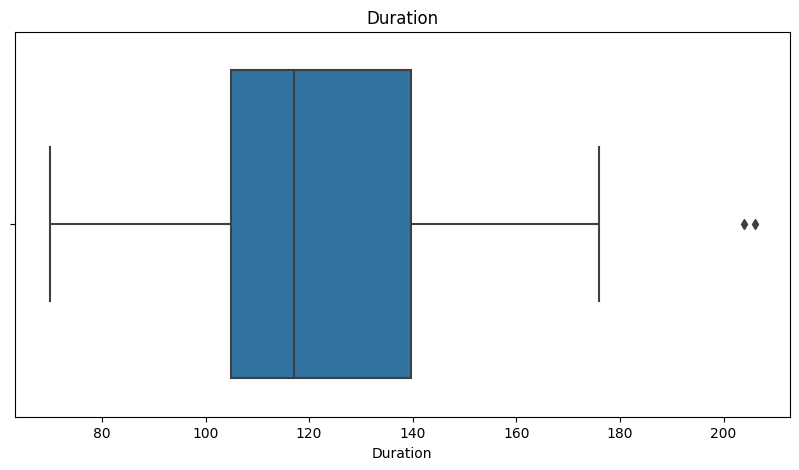

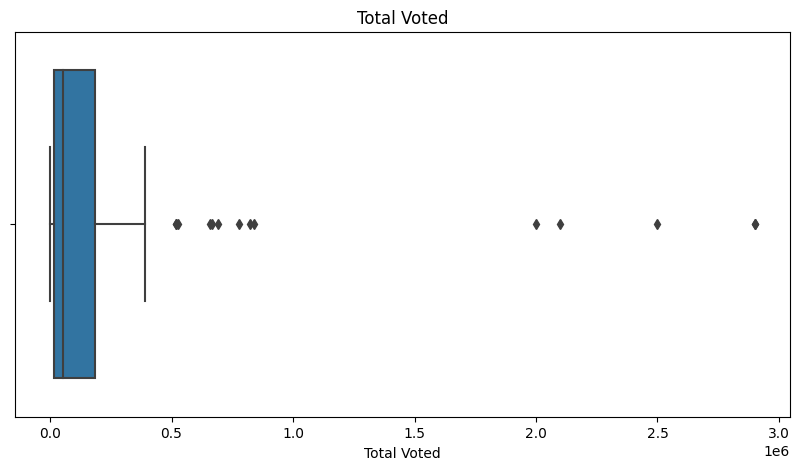

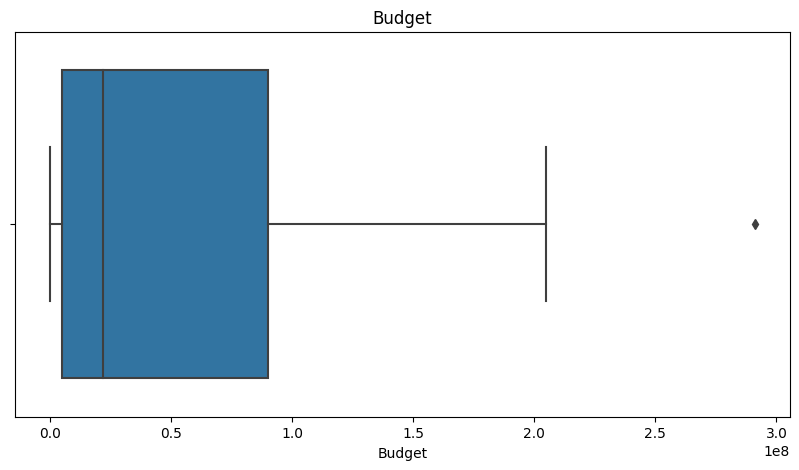

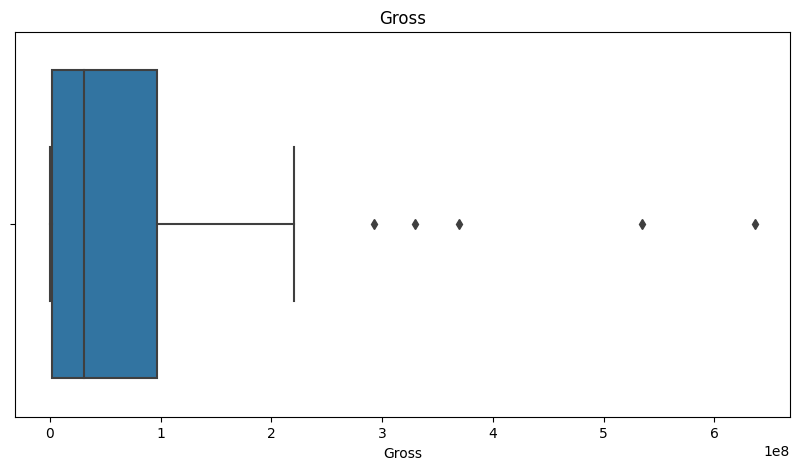

In [57]:
# Assuming 'df' is your DataFrame after applying the fix_numerical_columns function
def plot_boxplots(df):
    # Select only numeric columns for boxplot
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for column in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(column)
        plt.show()

# Now call the function with your DataFrame
plot_boxplots(df)

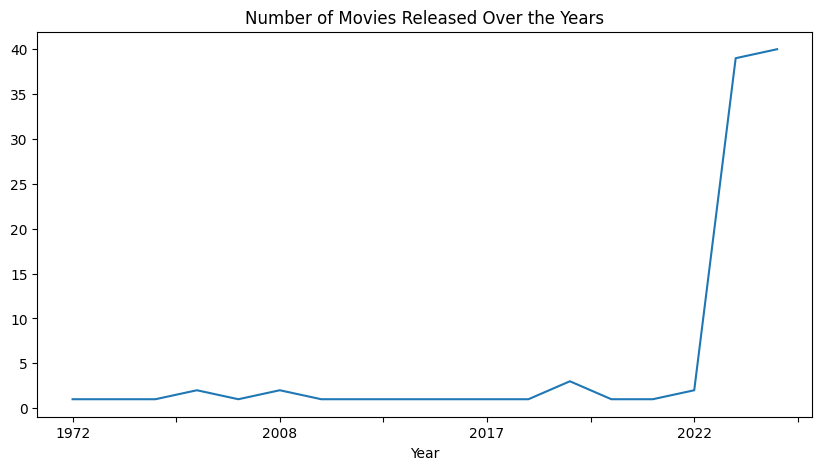

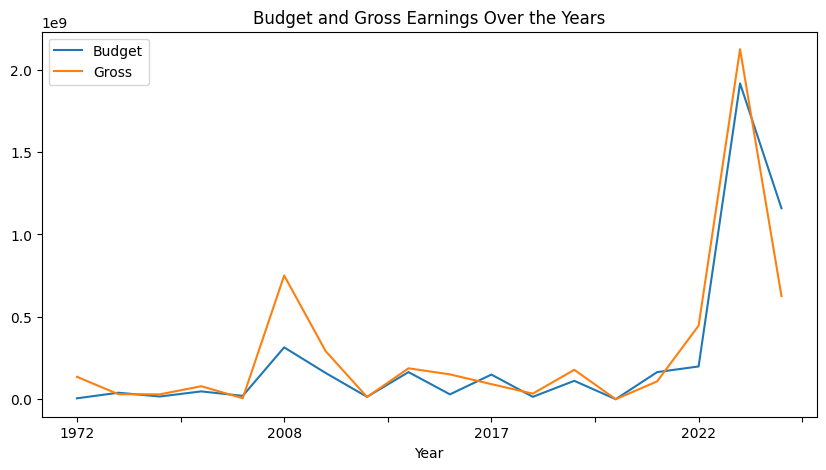

In [58]:
df.groupby('Year')['Title'].count().plot(kind='line', figsize=(10, 5))
plt.title('Number of Movies Released Over the Years')
plt.show()

# Budget and Gross trends over the years
df.groupby('Year')[['Budget', 'Gross']].sum().plot(kind='line', figsize=(10, 5))
plt.title('Budget and Gross Earnings Over the Years')
plt.show()

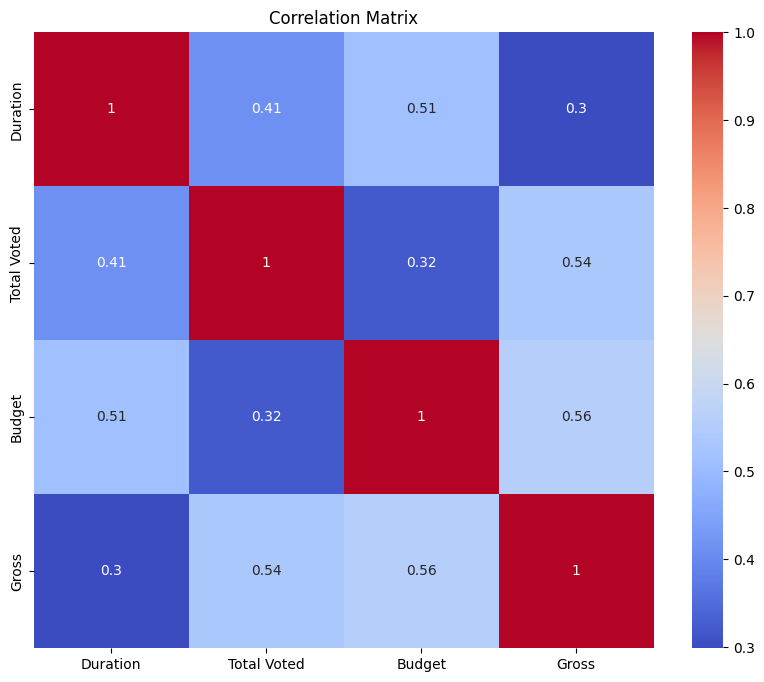

In [61]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


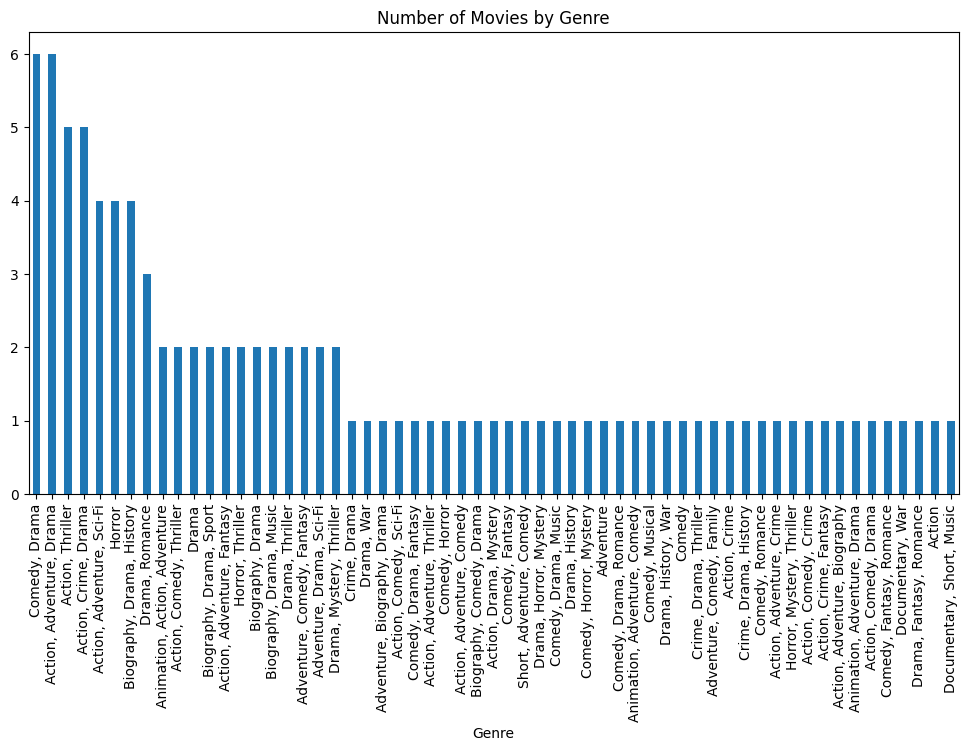

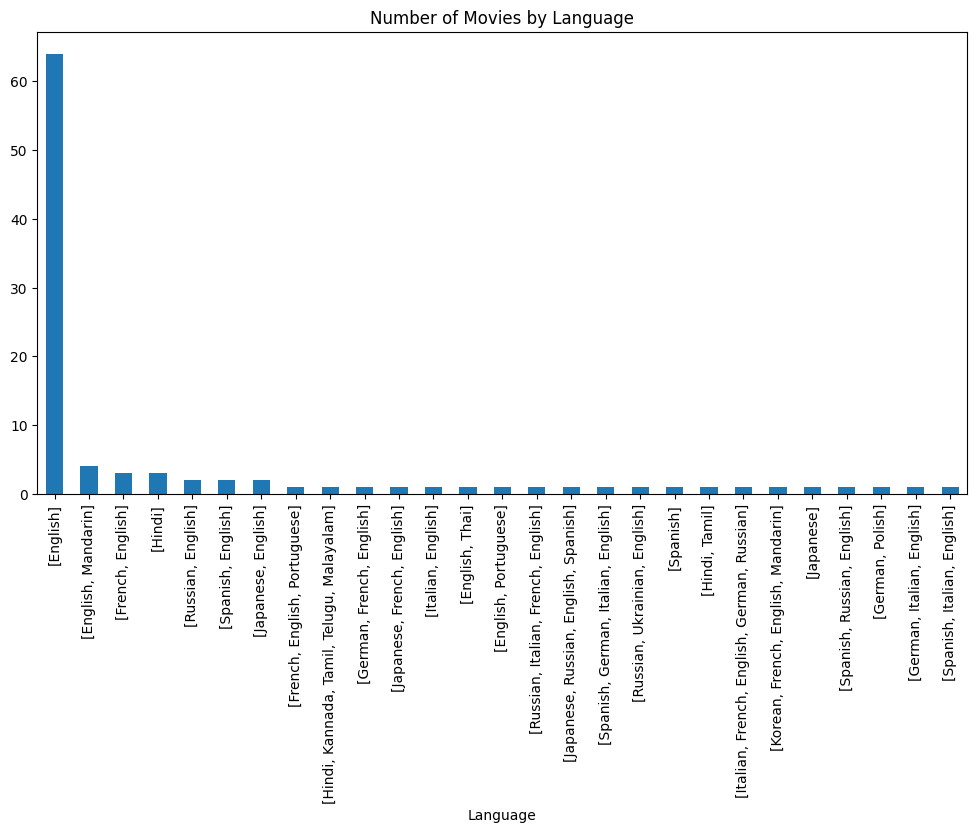

In [62]:
# Analysis of movies by Genre
plt.figure(figsize=(12, 6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.show()

# Analysis of movies by Language
plt.figure(figsize=(12, 6))
df['Language'].value_counts().plot(kind='bar')
plt.title('Number of Movies by Language')
plt.show()


In [68]:
actor_list = df['Top Actors'].str.split(', ').explode()
actor_list.value_counts()

Top Actors
Emma Stone           4
Ryan Gosling         4
Sydney Sweeney       3
Timothée Chalamet    3
Rebecca Ferguson     3
                    ..
Brian Tyree Henry    1
Rebecca Hall         1
Hiten Patel          1
Jyotika              1
Colin Farrell        1
Name: count, Length: 456, dtype: int64

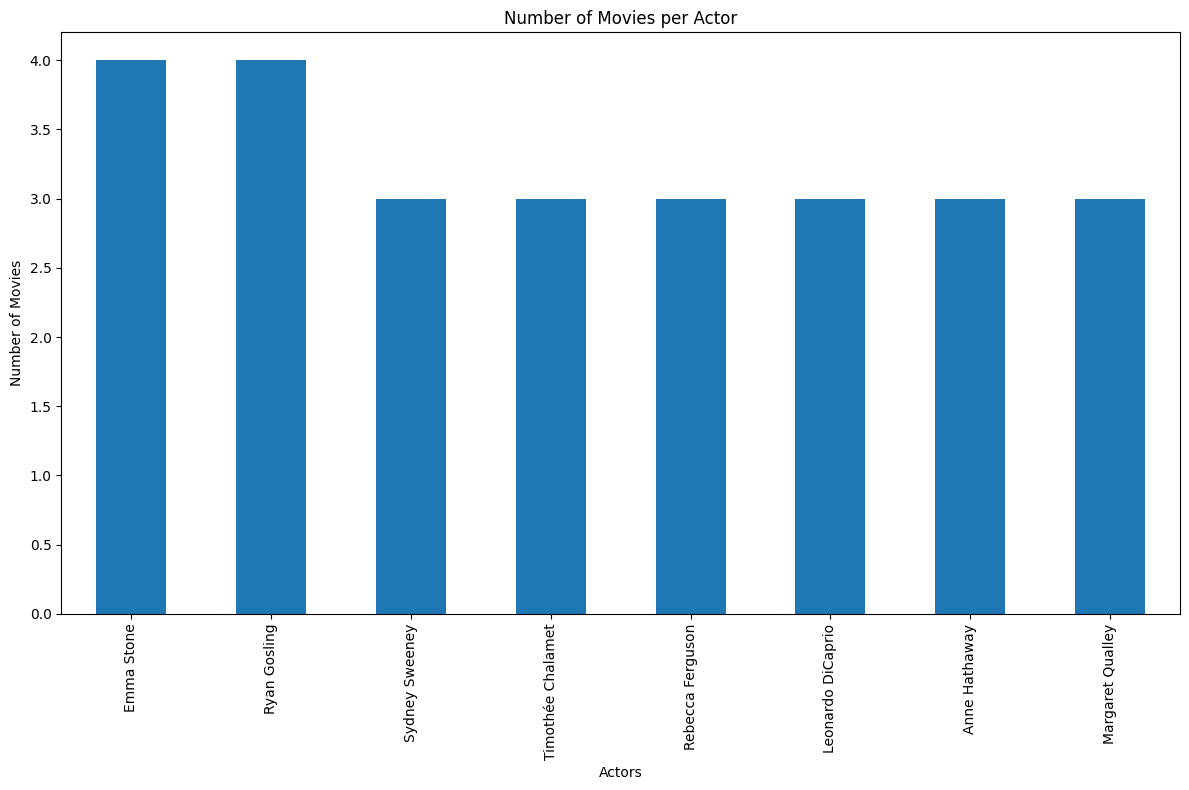

In [67]:
# Count the number of movies per actor
actor_counts = actor_list.value_counts().head(8)

# Plot the number of movies per actor
plt.figure(figsize=(12, 8))
actor_counts.plot(kind='bar')
plt.title('Number of Movies per Actor')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()